# Library & Dataset

In [1]:
!apt-get install -q google-cloud-sdk
!gcloud auth login

Reading package lists...
Building dependency tree...
Reading state information...
E: Unable to locate package google-cloud-sdk
Go to the following link in your browser, and complete the sign-in prompts:

    https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=32555940559.apps.googleusercontent.com&redirect_uri=https%3A%2F%2Fsdk.cloud.google.com%2Fauthcode.html&scope=openid+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fuserinfo.email+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fcloud-platform+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fappengine.admin+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fsqlservice.login+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fcompute+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Faccounts.reauth&state=Ryri2uh6KV7sl8arQJrwOf8io8zUcB&prompt=consent&token_usage=remote&access_type=offline&code_challenge=GjuKSIFUpby61BU6shh60AdntFc0ZXgegQjggApSTqw&code_challenge_method=S256

Once finished, enter the verification code provided in your browser: 4/0AeanS0aNFR-OtGY-

In [3]:
!ssh -i ~/.ssh/c269b4kx1022@bangkit.academy@34.16.250.100

usage: ssh [-46AaCfGgKkMNnqsTtVvXxYy] [-B bind_interface]
           [-b bind_address] [-c cipher_spec] [-D [bind_address:]port]
           [-E log_file] [-e escape_char] [-F configfile] [-I pkcs11]
           [-i identity_file] [-J [user@]host[:port]] [-L address]
           [-l login_name] [-m mac_spec] [-O ctl_cmd] [-o option] [-p port]
           [-Q query_option] [-R address] [-S ctl_path] [-W host:port]
           [-w local_tun[:remote_tun]] destination [command [argument ...]]


In [ ]:
import pandas as pd
import tensorflow as tf
import sklearn
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [ ]:
!wget https://raw.githubusercontent.com/GoEco-Living/MachineLearning/refs/heads/main/Dataset/meals.csv
!wget https://raw.githubusercontent.com/GoEco-Living/MachineLearning/refs/heads/main/Dataset/transport.csv

meals_df = pd.read_csv('meals.csv')
transport_df = pd.read_csv('transport.csv')

# Rename category
for index, row in meals_df.iterrows():
    if row['Category'] in ['fish frozen', 'fish processed', 'shellfish', 'shellfish frozen']:
        meals_df.at[index, 'Category'] = 'Fish'
    else:
        meals_df.at[index, 'Category'] = row['Category']

--2024-12-06 06:17:16--  https://raw.githubusercontent.com/GoEco-Living/MachineLearning/refs/heads/main/Dataset/meals.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8467 (8.3K) [text/plain]
Saving to: ‘meals.csv.1’

meals.csv.1         100%[===================>]   8.27K  --.-KB/s    in 0s      

2024-12-06 06:17:17 (62.3 MB/s) - ‘meals.csv.1’ saved [8467/8467]

--2024-12-06 06:17:17--  https://raw.githubusercontent.com/GoEco-Living/MachineLearning/refs/heads/main/Dataset/transport.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
L

# Model

## Meals Model

In [ ]:
meals_mapping = {category: idx for idx, category in enumerate(meals_df["Category"].unique())}
meals_df["Category_encoded"] = meals_df["Category"].map(meals_mapping)

X = meals_df["Category_encoded"].values.reshape(-1, 1)
y = meals_df["Carbon kg CO2eq/kg"].values.reshape(-1, 1)

scaler = MinMaxScaler()
y_normalized = scaler.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_normalized, test_size=0.2, random_state=42)

def create_meal_model():
    meal_input = tf.keras.layers.Input(shape=(1,), name="meal_input")

    meal_embedding = tf.keras.layers.Embedding(input_dim=len(meals_mapping), output_dim=5)(meal_input)
    meal_flatten = tf.keras.layers.Flatten()(meal_embedding)

    dense_1 = tf.keras.layers.Dense(64, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(0.01))(meal_flatten)
    dropout_1 = tf.keras.layers.Dropout(0.2)(dense_1)

    dense_2 = tf.keras.layers.Dense(32, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(0.01))(dropout_1)
    carbon_output = tf.keras.layers.Dense(1, activation="linear", name="meal_carbon_output")(dense_2)

    optimizer = tf.keras.optimizers.Adam()
    model = tf.keras.Model(inputs=[meal_input], outputs=[carbon_output])
    model.compile(optimizer=optimizer, loss="mse", metrics=["mae"])

    return model

meal_model = create_meal_model()
meal_model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ meal_input (InputLayer)              │ (None, 1)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ embedding (Embedding)                │ (None, 1, 5)                │              25 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 5)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │             384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ meal_carbon_output (Dense)           │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,522 (9.85 KB)

 Trainable params: 2,522 (9.85 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train
history = meal_model.fit(X_train, y_train, epochs=100, validation_split=0.6)

Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 123ms/step - loss: 0.5062 - mae: 0.0307 - val_loss: 0.4921 - val_mae: 0.0338
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.4820 - mae: 0.0267 - val_loss: 0.4690 - val_mae: 0.0357
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.4587 - mae: 0.0263 - val_loss: 0.4469 - val_mae: 0.0336
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.4367 - mae: 0.0229 - val_loss: 0.4259 - val_mae: 0.0301
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.4157 - mae: 0.0200 - val_loss: 0.4057 - val_mae: 0.0289
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.3963 - mae: 0.0215 - val_loss: 0.3862 - val_mae: 0.0291
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.3766 - mae: 0.0198 - val_loss: 0.3675 - val_mae: 0.0299
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.3580 - mae: 0.0189 - val_loss: 0.3498 - val_mae: 0.0300
Epoch 9/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.3406 - mae:

In [ ]:
# Test
loss, mae = meal_model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {loss}")
print(f"Test MAE: {mae}")

Test Loss: 0.002907788148149848
Test MAE: 0.027186332270503044


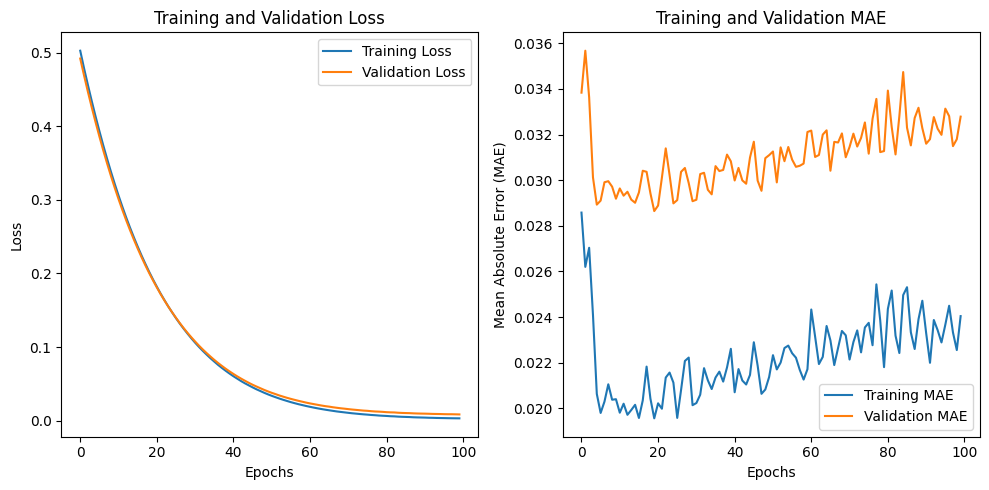

In [ ]:
history_data = history.history

plt.figure(figsize=(10, 5))

# training loss & validation loss
plt.subplot(1, 2, 1)
plt.plot(history_data['loss'], label='Training Loss')
plt.plot(history_data['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# MAE
plt.subplot(1, 2, 2)
plt.plot(history_data['mae'], label='Training MAE')
plt.plot(history_data['val_mae'], label='Validation MAE')
plt.title('Training and Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error (MAE)')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
print(meals_mapping)

{'Vegan': 0, 'Vegetarian': 1, 'Fish': 2, 'Beef': 3, 'Chicken': 4}


In [ ]:
sample_category = np.array([meals_mapping['Beef']])
predicted_carbon = meal_model.predict(sample_category)
predicted_carbon_actual = scaler.inverse_transform(predicted_carbon)

print(f"Predicted carbon emission for the food : {predicted_carbon_actual[0][0]} kg CO2eq")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 437ms/step
Predicted carbon emission for the food : 4.457740783691406 kg CO2eq


In [ ]:
# recomend system
def recommend_lower_carbon(category_input, model, meals_mapping, scaler):
    input_index = meals_mapping.get(category_input, None)
    if input_index is None:
        print("Kategori tidak valid.")
        return []

    sample_category = np.array([input_index])
    predicted_carbon = model.predict(sample_category)
    predicted_carbon_actual = scaler.inverse_transform(predicted_carbon)
    user_carbon = predicted_carbon_actual[0][0]

    print(f"Predicted carbon emission for '{category_input}': {user_carbon} kg CO2eq")

    lower_carbon_recommendations = []

    for category, index in meals_mapping.items():
        if category != category_input:
            sample_category = np.array([index])
            predicted_carbon = model.predict(sample_category)
            predicted_carbon_actual = scaler.inverse_transform(predicted_carbon)
            carbon_value = predicted_carbon_actual[0][0]

            if carbon_value < user_carbon:
                lower_carbon_recommendations.append((category, carbon_value))

    lower_carbon_recommendations.sort(key=lambda x: x[1])
    return lower_carbon_recommendations

# Usage
category_input = "Beef"
lower_carbon_recs = recommend_lower_carbon(category_input, meal_model, meals_mapping, scaler)

if lower_carbon_recs:
    print("\nRecommended meals with lower carbon emissions:")
    for rec in lower_carbon_recs:
        print(f"{rec[0]}: {rec[1]:.2f} kg CO2eq")
else:
    print("No meals with lower carbon emissions found.")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Predicted carbon emission for 'Beef': 4.457740783691406 kg CO2eq
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step

Recommended meals with lower carbon emissions:
Vegan: 2.42 kg CO2eq
Vegetarian: 3.90 kg CO2eq
Chicken: 4.07 kg CO2eq
Fish: 4.34 kg CO2eq


In [ ]:
meal_model.save('meals.h5')

## Transport

In [ ]:
transport_df["Category_encoded"] = LabelEncoder().fit_transform(transport_df["Category"])

distance_scaler = MinMaxScaler()
transport_df["Distance_normalized"] = distance_scaler.fit_transform(transport_df[["Distance (km)"]])

emission_scaler = MinMaxScaler()
transport_df["Carbon_Emission_normalized"] = emission_scaler.fit_transform(transport_df[["Carbon Emission (kg CO2)"]])

X_category = transport_df["Category_encoded"].values
X_distance = transport_df["Distance_normalized"].values
y = transport_df["Carbon_Emission_normalized"].values

X_cat_train, X_cat_test, X_dist_train, X_dist_test, y_train, y_test = train_test_split(
    X_category, X_distance, y, test_size=0.2, random_state=42
)

def create_transport_model(num_categories):
    category_input = tf.keras.layers.Input(shape=(1,), name="category_input")
    category_embedding = tf.keras.layers.Embedding(input_dim=num_categories, output_dim=5)(category_input)
    category_flatten = tf.keras.layers.Flatten()(category_embedding)

    distance_input = tf.keras.layers.Input(shape=(1,), name="distance_input")
    combined = tf.keras.layers.Concatenate()([category_flatten, distance_input])

    dense_1 = tf.keras.layers.Dense(64, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(0.01))(combined)
    dropout_1 = tf.keras.layers.Dropout(0.5)(dense_1)
    dense_2 = tf.keras.layers.Dense(32, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(0.01))(dropout_1)
    carbon_output = tf.keras.layers.Dense(1, activation="linear", name="carbon_output")(dense_2)

    model = tf.keras.Model(inputs=[category_input, distance_input], outputs=[carbon_output])
    model.compile(optimizer="adam", loss="mse", metrics=["mae"])
    return model
num_categories = transport_df["Category_encoded"].nunique()

transport_model = create_transport_model(num_categories)
transport_model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ category_input            │ (None, 1)              │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding_1 (Embedding)   │ (None, 1, 5)           │             25 │ category_input[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten_1 (Flatten)       │ (None, 5)              │              0 │ embedding_1[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ distance_input            │ (None, 1)              │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate (Concatenate) │ (None, 6)              │              0 │ flatten_1[0][0],       │
│                           │                        │                │ distance_input[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_2 (Dense)           │ (None, 64)             │            448 │ concatenate[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_1 (Dropout)       │ (None, 64)             │              0 │ dense_2[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_3 (Dense)           │ (None, 32)             │          2,080 │ dropout_1[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ carbon_output (Dense)     │ (None, 1)              │             33 │ dense_3[0][0]          │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 2,586 (10.10 KB)

 Trainable params: 2,586 (10.10 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train
history = transport_model.fit(
    [X_cat_train, X_dist_train],
    y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=32
)

Epoch 1/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.5824 - mae: 0.1693 - val_loss: 0.4791 - val_mae: 0.1276
Epoch 2/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.4720 - mae: 0.1485 - val_loss: 0.3988 - val_mae: 0.1229
Epoch 3/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3935 - mae: 0.1446 - val_loss: 0.3316 - val_mae: 0.1217
Epoch 4/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.3295 - mae: 0.1439 - val_loss: 0.2755 - val_mae: 0.1185
Epoch 5/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2709 - mae: 0.1349 - val_loss: 0.2293 - val_mae: 0.1214
Epoch 6/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2341 - mae: 0.1502 - val_loss: 0.1911 - val_mae: 0.1199
Epoch 7/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1959 - mae: 0.1470 - val_loss: 0.1598 - val_mae: 0.1181
Epoch 8/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1668 - mae: 0.1456 - val_loss: 0.1343 - val_mae: 0.1189
Epoch 9/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.13

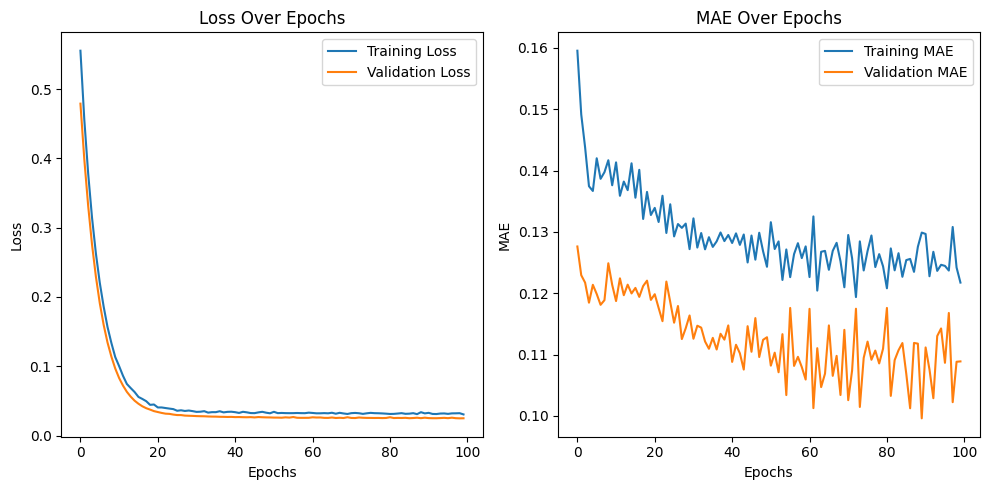

In [ ]:
def plot_training_history(history):
    # Plot Loss
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history["loss"], label="Training Loss")
    plt.plot(history.history["val_loss"], label="Validation Loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.title("Loss Over Epochs")
    plt.legend()

    # Plot MAE
    plt.subplot(1, 2, 2)
    plt.plot(history.history["mae"], label="Training MAE")
    plt.plot(history.history["val_mae"], label="Validation MAE")
    plt.xlabel("Epochs")
    plt.ylabel("MAE")
    plt.title("MAE Over Epochs")
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_training_history(history)

In [ ]:
def recommend_transport(category, distance_km, model, distance_scaler, emission_scaler, category_encoder):
    categories = list(category_encoder.classes_)
    if category not in categories:
        return f"Invalid category. Choose from: {', '.join(categories)}", ""

    category_idx = category_encoder.transform([category])[0]
    input_distance_df = pd.DataFrame({"Distance (km)": [distance_km]})
    input_distance_normalized = distance_scaler.transform(input_distance_df)[0][0]

    predicted_emission = model.predict({
        "category_input": np.array([category_idx]),
        "distance_input": np.array([input_distance_normalized])
    })[0][0]
    predicted_emission_actual = emission_scaler.inverse_transform([[predicted_emission]])[0][0]
    transport_output = f"{category} with a distance of {distance_km} km emits {predicted_emission_actual:.2f} kg CO2."

    recommendations = []
    for other_category in categories:
        other_idx = category_encoder.transform([other_category])[0]
        emission = model.predict({
            "category_input": np.array([other_idx]),
            "distance_input": np.array([input_distance_normalized])
        })[0][0]
        emission_actual = emission_scaler.inverse_transform([[emission]])[0][0]
        if emission_actual < predicted_emission_actual:
            recommendations.append((other_category, emission_actual))

    if recommendations:
        recommendations.sort(key=lambda x: x[1])
        recommendations_output = "Recommendations for lower emission:\n" + "\n".join(
            [f"- {r[0]}: {r[1]:.2f} kg CO2" for r in recommendations]
        )
    else:
        recommendations_output = "No transport with lower emission found."

    return transport_output, recommendations_output

In [ ]:
category_input = 'Private'
distance_input = 300

transport_output, recommendations_output = recommend_transport(
    category=category_input,
    distance_km=distance_input,
    model=transport_model,
    distance_scaler=distance_scaler,
    emission_scaler=emission_scaler,
    category_encoder=LabelEncoder().fit(transport_df["Category"])
)

print(transport_output)
print(recommendations_output)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Private with a distance of 300 km emits 27.33 kg CO2.
Recommendations for lower emission:
- Bike: 6.31 kg CO2
- Walk: 7.41 kg CO2
- Public: 21.29 kg CO2
- Motorcycle: 27.07 kg CO2


In [ ]:
transport_model.save('transport.h5')